In [1]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('soft.csv');
#df.head(2)
df.head(5)

,Time,Fault
0,0,0
1,1,6
2,2,1
3,3,1
4,4,0


In [2]:
length=len(df['Fault'])
sum=0;
for i in range(1,length):
    sum= sum+df['Fault'][i]
    df['Fault'][i]=sum
    #print(sum)

df.head(10)

,Time,Fault
0,0,0
1,1,6
2,2,7
3,3,8
4,4,8
5,5,9
6,6,12
7,7,12
8,8,17
9,9,23


In [3]:
df['Time1']=df[df.columns[0]]
df['Fault1']=df['Fault']


In [5]:

df.Fault1=df.Fault1.astype(float)




length= len(df['Fault1'])
for i in range(1,length):
    df['Fault1'][i]=math.log(df['Fault'][i],10)
    df['Time1'][i] =math.log(i,10)  
    
df.head(10)
  

<ipython-input-5-1ae8e9d94d68>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fault1'][i]=math.log(df['Fault'][i],10)
<ipython-input-5-1ae8e9d94d68>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time1'][i] =math.log(i,10)


,Time,Fault,Time1,Fault1
0,0,0,0.000000,0.000000
1,1,6,0.000000,0.778151
2,2,7,0.301030,0.845098
3,3,8,0.477121,0.903090
4,4,8,0.602060,0.903090
5,5,9,0.698970,0.954243
6,6,12,0.778151,1.079181
7,7,12,0.845098,1.079181
8,8,17,0.903090,1.230449
9,9,23,0.954243,1.361728


In [6]:
#Test With First 10 data
First_TenDataFults=[];
First_TenDataInput=[];
for i in range(1,11):
    First_TenDataInput.append(df['Time1'][i])
    First_TenDataFults.append( df['Fault1'][i])
    
mean_x=np.mean(First_TenDataInput)
mean_y=np.mean( First_TenDataFults)

numer=0.0
dnum=0.0

for i in range(10):
    numer+=(First_TenDataInput[i]-mean_x)*(First_TenDataFults[i]-mean_y)
    dnum+=(First_TenDataInput[i]-mean_x)*(First_TenDataInput[i]-mean_x)

In [7]:
First_TenDataFults

[0.7781512503836435,
 0.8450980400142567,
 0.9030899869919434,
 0.9030899869919434,
 0.9542425094393249,
 1.0791812460476247,
 1.0791812460476247,
 1.2304489213782739,
 1.3617278360175928,
 1.380211241711606]

In [8]:
cof_= numer/dnum
print(cof_)
intercept_=mean_y -(mean_x*cof_)
print(intercept_)

0.5935562826364373
0.6620833704253561


In [9]:
def predeict(x):
    return x*cof_+intercept_

In [10]:
predictResult=[]
for i in range(1,11):
    predictResult.append(predeict(math.log(i,10)))

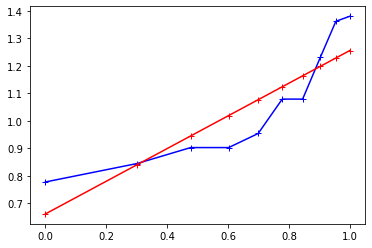

In [11]:

plt.xlabel='Year'
plt.ylabel='Fault'
#plt.scatter(df.Year,df.percent,color='RED', marker='+')
plt.plot(First_TenDataInput,First_TenDataFults,color='blue',marker='+')
plt.plot(First_TenDataInput,predictResult,color='RED',marker='+')

In [12]:
##PredictNext5data Analysis

totalError=0.0;
for i in range(11,16):
    temp= 10**predeict(math.log(i,10));
    Error=abs(df['Fault'][i]- temp)
    totalError+=Error;

    tempP=(Error/temp)*100
    print("Input =",i,"Ex=",df['Fault'][i]," Pr",'%.2f'%temp," Error=",'%.2f'%Error," in percent Error",'%.2f'%tempP)

print("\n**Average Error for the Next 5  ", (totalError/5))     

Input = 11 Ex= 24  Pr 19.06  Error= 4.94  in percent Error 25.89
Input = 12 Ex= 27  Pr 20.07  Error= 6.93  in percent Error 34.50
Input = 13 Ex= 36  Pr 21.05  Error= 14.95  in percent Error 71.01
Input = 14 Ex= 39  Pr 22.00  Error= 17.00  in percent Error 77.29
Input = 15 Ex= 41  Pr 22.92  Error= 18.08  in percent Error 78.91

**Average Error for the Next 5   12.379284963185608
